<br><br>
<span style="font-size:2em;font-weight:lighter;">194.025 Introduction to Machine Learning</span><br>
<span style="font-size:3em;font-weight:normal;line-height:70%;">Assignment 7: Probabilistic Models</span>

---



Welcome to the 7th assignment of our course **Introduction to Machine Learning**. You will be able to earn up to a total of 10 points. Please read all descriptions carefully to get a full picture of what you have to do. 

**Remark:** Some code cells are put to read-only. Please execute them regardless as they contain important code. You can run a jupyter cell by pressing `SHIFT + ENTER`, or by pressing the play button on top (in the row where you can find the save button). Cells where you have to implement code contain the comment `# YOUR CODE HERE` followed by `raise NotImplementedError`. Simply remove the `raise NotImplementedError`and insert your code.

Some other code cells start with the comment `# hidden tests ...`. Please do not change them in any way as they are used to grade the tasks after your submission.

**NOTE**: in order for the automated tests to work correctly, please **do not** create any variable/function/class name beginning with a leading underscore, e.g., `_my_variable` or with the word 'solution', e.g., `solution_variable`.

This assignment will cover an introdcutory probabilistic example and bayesian networks.

In [1]:
import numpy as np
import pandas as pd
import random

#### The Urn and the Coin Example Continued (5 points)

As presented in the lecture, we will revisit the Urn and the coin example.

Assuming that we have an Urn with 3 types of coins A,B and C. We pick a coin from the urn without any knowledge of the type of the coin. The prior probailities of picking a coin for each type is given in the column P(Coin). The probability with wich each coin turns up heads is given in column P(Data = Heads|Coin).

Our goal is that given N coin tosses of the chosen coin, infer the posterior probability distribution over the chosen coin types. (3 Points)

After having observed all the data of N coin tosses, what is the probability of observing another toss turn Heads? (2 point)

In [2]:
probs = {
    'Coin': ['A', 'B', 'C'],
    'P(Coin)': [0.4, 0.4, 0.2],
    'P(Data = Heads|Coin)': [0.2, 0.6, 0.9],
}

df_coins = pd.DataFrame(probs)

print(df_coins)

  Coin  P(Coin)  P(Data = Heads|Coin)
0    A      0.4                   0.2
1    B      0.4                   0.6
2    C      0.2                   0.9


If we observe the coin toss once, and observe a Tails, then following the bayesian update procedure as presented in the lecture, our updated posterior probabilities on the coin type would be 

[0.64,0.32,0.04]

Where the entries in the list are posterior probabilities P(Coin = A|Data = Tails), P(Coin = B|Data = Tails) and P(Coin = C|Data = Tails) respectivaly.

Now, we toss the (same) coin again, and say it comes up Heads. Now, we can update our belief in the type of the chosen coin again by using the previously obtained posterior as the new prior i.e. in the pandas dataframe above (df_coins) we can replace the P(Coin) with [0.64,0.32,0.04] and repeat the same procedure again --- this time for data being Heads, to get the new posterior that take into account both the coin tosses. This time the posterior will come out to be 

[0.35955056179775285, 0.5393258426966292, 0.10112359550561796]

You need to impliment a the function Posterior(df, Data) that takes in a data frame of the form df_coins and Data of the form  ['Heads', 'Tails', ...], and returns the poserior probability distribution as a list.  And then you need to impliment the function Prob_new_toss_heads(df, Data), that takes the same input as Posterior(df, Data), but returns the probability of seeing a new coin trun up Heads. Please make sure that you pass separate copies of df_coins to   Posterior(df, Data)  and Prob_new_toss_heads(df, Data), otherwise the tests will fail.

For revising these concepts please look at lecture notes and very similar following notes from [MIT OCW](
https://ocw.mit.edu/courses/18-05-introduction-to-probability-and-statistics-spring-2022/resources/mit18_05_s22_class11-prep_pdf/)


In [3]:
def Data_Generation(N):
    coins = list(df_coins['Coin'])
    coin = random.choices(coins, weights=(0.4, 0.4, 0.2), k=1)[0]
    prob = list(df_coins[df_coins['Coin'] == coin]['P(Coin)'])[0]
    faces = ['Heads', 'Tails']
    Data = random.choices(faces, weights=(prob, 1-prob), k=N)
    return Data

Data  = Data_Generation(100)

In [ ]:
def Posterior(df, Data):
    """
    3 points
    A function that takes in df_coins as the first argument and data of the form ['Heads', 'Tails','Heads', ...].
    Return the posterior probability on the con classes given after iteratively running bayesian update on each 
    individual coin toss data. 
    Please work with deep copy of dataframes, and make sure that the df_coins passed to the function is same as the one provided in code.

    For example: for df =  df_coins, Data = ['Tails', 'Heads'], the output must be [0.35955056179775285, 0.5393258426966292, 0.10112359550561796]

    """
    # YOUR CODE HERE

    df_copy = df.copy(deep=True)                        # deep copy
    
    probs = df_copy['P(Coin)']                          # prior
    cond_probs = df_copy['P(Data = Heads|Coin)']        # likelihood
    posteriori = probs                                  # this is the initial prior          

    for i in range(len(Data)):
        prior = posteriori                              # initial prior set
        if Data[i] == 'Heads':
            bayes_num = prior * cond_probs
        else:
            bayes_num = prior * (1 - cond_probs)    
        posteriori = bayes_num/bayes_num.sum()

    return posteriori.tolist()

def Prob_new_toss_heads(df, Data):
    """
    2 points
    A function that takes in df_coins as the first argument and data of the form ['Heads', 'Tails', ...].
    Return the probability of getting Heads again.

    Please work with deep copy of dataframes, and make sure that the df_coins passed to the function is same as the one originally provided.

    For example: for df =  df_coins, for Data = ['Tails','Heads'], the output must be 0.48651685393258426
    """
    # YOUR CODE HERE

    df_copy = df.copy(deep=True)                        # deep copy
    cond_probs = df_copy['P(Data = Heads|Coin)']        # likelihood
    cond_probs_list = cond_probs.tolist()
    posteriori_list = Posterior(df, Data)

    # P(Heads next) = ∑(i) P(Coin_i|Data) × P(Heads|Coin_i)
    return float(np.dot(posteriori_list, cond_probs_list))

# Your code will be tested as follows for various N:

# Data  = Data_Generation(N)

# df_trial = df_coins.copy()
# CHECK: Posterior(df_trial,Data) == Posterior_HIDDEN(df_trial,Data)

# df_trial = df_coins.copy()
# CHECK: Prob_new_toss_heads(df_trial,Data) == Prob_new_toss_heads_HIDDEN(df_trial,Data)

In [ ]:
# hidden tests - DO NOT CHANGE THIS CELL

In [ ]:
# hidden tests - DO NOT CHANGE THIS CELL

#### Excercise 2: Bayesian Network (5 points)

You are provided a Bayes Net, with random variables A, B, C and D. 

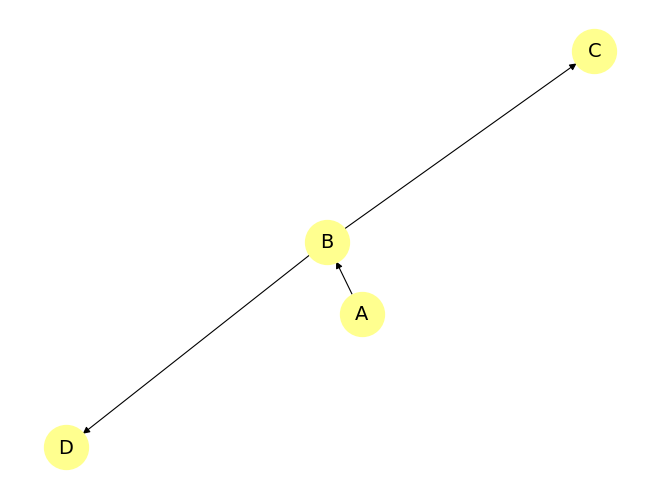

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline


triangle_graph = nx.DiGraph([('A', 'B'), ('B', 'C'), ('B', 'D')])
nx.draw(
    triangle_graph,
    with_labels=True,
    node_size=1000,
    node_color="#ffff8f",
    width=0.8,
    font_size=14,
)

In the following you are provided the conditional probability distributions (cpds) for the binary random variables variables A,B,C and D.
Whose joint probability distribution follows the Bayesian Netowrk above.
The dictionary cpd encodes the conditional probability distributions of the node variables being 1, given their
parent's state i.e. [P(node=1|parent =1), P(node=1|parent =0)]
you can use this information to get [P(node=0|parent =1), P(node=0|parent =0)], by observing the fact 
that conditional probabilities sum to one, for a fixed condition.

Note that since A has no parent, we only provide the P[A=1] probability in its node.
The example is inspired from: https://www.cs.cmu.edu/~15281/coursenotes/bayesnets/index.html

In [20]:
cpds = {
    'A': {'values': [0.1], 'parents': []},
    'B': {'values': [0.667, 0.25], 'parents': ['A']},
    'C': {'values': [0.4, 0.2], 'parents': ['B']},
    'D': {'values': [0.25, 0.5], 'parents': ['B']}
}

In [21]:
#Your first task would be to write a function that given the state of random variables D and random variable B, 
#returns the conditional probability  of state D given the state B i.e. returns P(D = state_D, B= state_B)

def prob_D_given_B(state_D, state_B):
    """
    1 point
    takes in the states of D and state of B, and returns the P(D = state_D| B = State_B)
    returns a float value
    """
    # YOUR CODE HERE

    # According to cpds['D']['values'] = [P(D=1|B=1), P(D=1|B=0)]
    parent_index = 0 if state_B == 1 else 1
    p_d1_given_b = cpds['D']['values'][parent_index]

    return p_d1_given_b if state_D == 1 else 1 - p_d1_given_b

#Your second task is to get the joint probability of the random variables A,B,C and D.
#You will need to use the factorization as ascribed by the Bayesian Netowrk above.

def joint_probability(state):
    """
    3 points
    takes in state as a list of 4 binary values as a list, e.g. [0,1,1,0], representing state A=0,B=1,C=1 and D=0 respectivaly.
    returns the proabability of the state (float value)
    For example, the input joint_probability([1,1,1,1]), returns 0.00667
    """
    # YOUR CODE HERE

    a, b, c, d = state

    # P(A)
    p_a1 = cpds['A']['values'][0]
    p_a = p_a1 if a == 1 else 1 - p_a1

    # P(B | A)
    parent_index_b = 0 if a == 1 else 1
    p_b1_given_a = cpds['B']['values'][parent_index_b]
    p_b = p_b1_given_a if b == 1 else 1 - p_b1_given_a

    # P(C | B)
    parent_index_c = 0 if b == 1 else 1
    p_c1_given_b = cpds['C']['values'][parent_index_c]
    p_c = p_c1_given_b if c == 1 else 1 - p_c1_given_b

    # P(D | B)
    parent_index_d = 0 if b == 1 else 1
    p_d1_given_b = cpds['D']['values'][parent_index_d]
    p_d = p_d1_given_b if d == 1 else 1 - p_d1_given_b

    return p_a * p_b * p_c * p_d

    # P(A,B,C,D) = P(A)⋅ P(B∣A)⋅ P(C∣B)⋅ P(D∣B)
    return p_a * p_b * p_c * p_d

#finaly you will need to write a function that infers the marginal probability of single random variable's in it's state
def marginal_prob(RV, state):
    """
    1 point
    Takes in a RV (Random Variable) as a string('A','B','C' or 'D'), and the state of the RV (either 0 or 1). 
    Returns the marginal probability of the RV in the given state (a float between 0 and 1; float value).
    for example: marginal_prob('A',1) should return 0.1, and  marginal_prob('A',0) should be 0.9
    """
    # YOUR CODE HERE

    if RV == 'A':
        p_a1 = cpds['A']['values'][0]
        return p_a1 if state == 1 else 1 - p_a1

    index_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
    idx = index_map[RV]

    total = 0.0
    for s in product([0, 1], repeat=4):
        if s[idx] == state:
            total += joint_probability(s)
    return total

In [22]:
# hidden tests - DO NOT CHANGE THIS CELL

In [23]:
# hidden tests - DO NOT CHANGE THIS CELL

In [24]:
# hidden tests - DO NOT CHANGE THIS CELL